In [104]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36")
driver = webdriver.Chrome(options=options)

In [105]:
#Cria Dataframe
vinho_cols = ['Vinícola','Vinho','Avaliação','Qtde_Avaliações','Região','SubRegião']
vinho_df = pd.DataFrame(columns=vinho_cols)

#Uso do endpoint de api usado internamente pelo vivino:
# parâmetros:
#country_code = código do país
#currency_code = moeda a ser usada
#grape_filter =tipo de uva
#min_rating = avaliação mínima
#order_by = critério da ordenação
#order = direção da ordenação
#page = nro da página
#price_range_min = preço mínimo 
#price_range_max = preço máximo
#wine_type_ids = Tipo de vinho -1 (tinto), 2 (branco)

for x in range(1,100):
    r = requests.get(
        "https://www.vivino.com/api/explore/explore",
        params = {
            "currency_code":"BRL",	
            "min_rating":"1",
            "order_by":"ratings_average",
            "order":"asc",
            "page": 4,
            "wine_type_ids[]":"1"
        },
        headers= {
            "User-Agent": "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
        }
    )
    results = [
        (
        t["vintage"]["wine"]["winery"]["name"], 
        f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',
        t["vintage"]["statistics"]["ratings_average"],
        t["vintage"]["statistics"]["ratings_count"],
        t["vintage"]["wine"]["region"]["country"]["name"],
        t["vintage"]["wine"]["region"]["name"]
        )
        for t in r.json()["explore_vintage"]["matches"]
    ]    
    temp_df = pd.DataFrame(results,columns=vinho_cols)


In [106]:
temp_df = pd.DataFrame(results,columns=vinho_cols)

In [107]:
df = pd.DataFrame(temp_df)
df.to_csv('vivino_vinhos.csv', index=False, encoding='utf-8-sig')

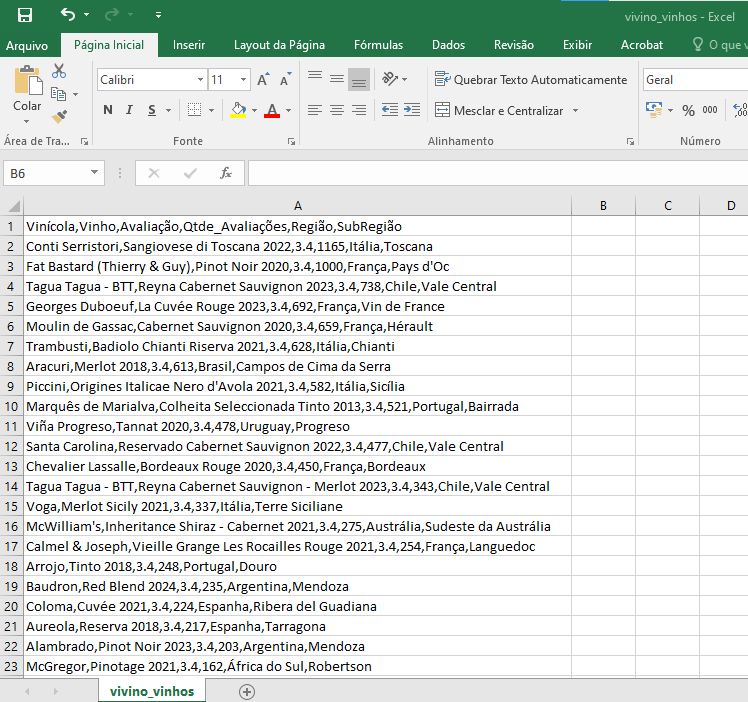